In [6]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
citydailydata = pd.read_csv('../data/city_day.csv')

In [10]:
citydailydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# 1. Exploring the data

In [11]:
def getArray(csvfile):
    city_daily_data = np.empty((0,16))
    for row in dailydata:
        city_daily_data = np.vstack((city_daily_data, np.array(row)))
    return city_daily_data

In [12]:
def getCities(data):
    cities = data['City'].value_counts().to_frame()
    print('CITIES COVERED IN THE DATA:')
    print('Total number of cities in the dataset :', len(cities))
    cities = cities.sort_index().index
    for i in cities:
        print(i)

In [13]:
def getDurationOfData(data):
    print('DURATION OF DATA:\nThe data is between', data['Date'].min(), 'and' , data['Date'].max())

In [14]:
def exploreData(data):
    getCities(data)
    getDurationOfData(data)

In [15]:
exploreData(citydailydata)

CITIES COVERED IN THE DATA:
Total number of cities in the dataset : 26
Ahmedabad
Aizawl
Amaravati
Amritsar
Bengaluru
Bhopal
Brajrajnagar
Chandigarh
Chennai
Coimbatore
Delhi
Ernakulam
Gurugram
Guwahati
Hyderabad
Jaipur
Jorapokhar
Kochi
Kolkata
Lucknow
Mumbai
Patna
Shillong
Talcher
Thiruvananthapuram
Visakhapatnam
DURATION OF DATA:
The data is between 2015-01-01 and 2020-07-01


# 2. Checking for Missing Values in the data

In [16]:
def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns = 
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print('------------------------------------------------------------------------------')
    print('MISSING VALUES IN DATA:\n------------------------------------------------------------------------------\n', missin_values_array, '\n')
    return missin_values_array

In [17]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

In [18]:
def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants

In [19]:
def handleMissingValues(data):
    missing_values = getMissingValues(data)
    updatedCityData = mergeColumns(data)
    updatedCityData, pollutants = subsetColumns(updatedCityData)
    return updatedCityData, pollutants

In [20]:
updatedCityData, newColumns = handleMissingValues(citydailydata)
print('------------------------------------------------------------------------------')
print('UPDATED DATA:\n------------------------------------------------------------------------------\n')
updatedCityData

------------------------------------------------------------------------------
MISSING VALUES IN DATA:
------------------------------------------------------------------------------
             Missing Values  % of Total Values
Xylene               18109               61.3
PM10                 11140               37.7
NH3                  10328               35.0
Toluene               8041               27.2
Benzene               5623               19.0
AQI                   4681               15.9
AQI_Bucket            4681               15.9
PM2.5                 4598               15.6
NOx                   4185               14.2
O3                    4022               13.6
SO2                   3854               13.1
NO2                   3585               12.1
NO                    3582               12.1
CO                    2059                7.0 

------------------------------------------------------------------------------
UPDATED DATA:
--------------------------------

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,NaN,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,NaN,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,NaN,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,NaN,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,NaN,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,Good,65.96,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,Satisfactory,98.47,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,Satisfactory,88.64,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,Satisfactory,66.61,29.26,0.52,9.84,28.30,0.00


# 3. Visualising the time series data

## a. Visualising the amount of pollutants in air over the years

In [14]:
def visualisePollutants(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
    axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')

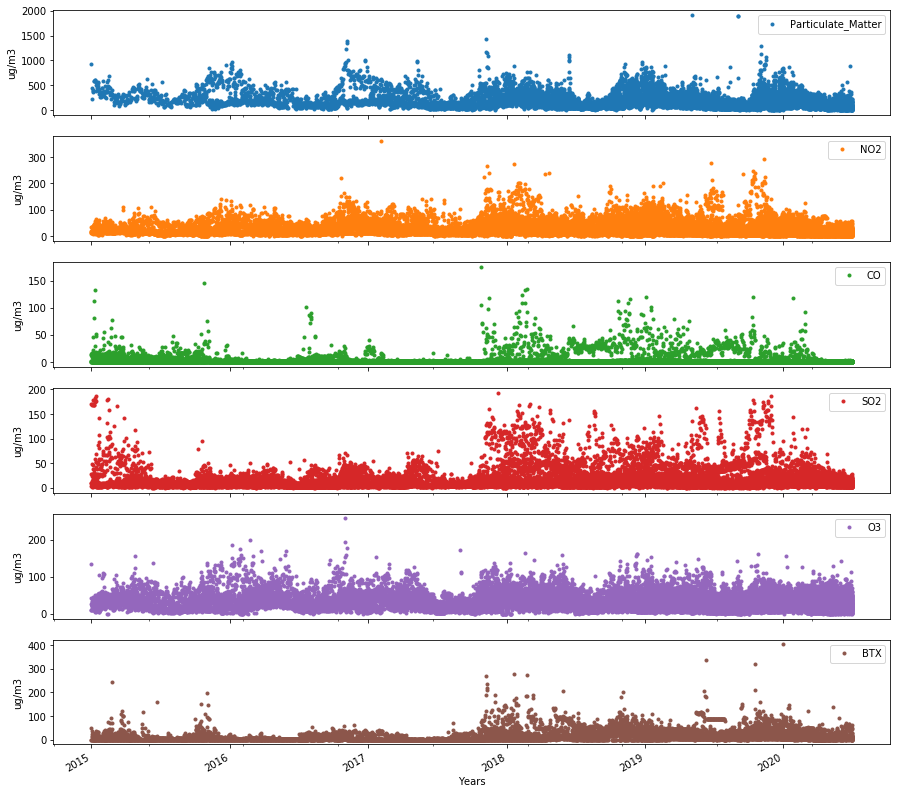

In [15]:
visualisePollutants(updatedCityData, newColumns)

## b. Visualising the amount of pollutants in air over the years and months

In [21]:
def trend_plot(updatedCityData, value):
    data = updatedCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()

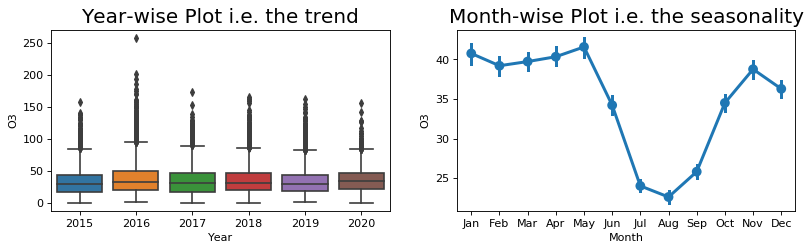

In [25]:
value='O3'
trend_plot(updatedCityData,value)

## c. Visualising AQI over the years 

### Calculation of AQI

1. The AQI calculation uses 7 measures: PM2.5(Particulate Matter 2.5-micrometer), PM10, SO2, NOx, NH3, CO and O3(ozone).

2. For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

3. For CO and O3 the maximum value in last 8-hrs is used.

4. Each measure is converted into a Sub-Index based on pre-defined groups.

5. Sometimes measures are not available due to lack of measuring or lack of required data points.

6. Final AQI is the maximum Sub-Index with the condition that at least one of PM2 and PM10 should be available and at least three out of the seven should be available.

### How is AQI calculated?
1. The Sub-indices for individual pollutants at a monitoring location are calculated using its
24-hourly average concentration value (8-hourly in case of CO and O3) and health
breakpoint concentration range. The worst sub-index is the AQI for that location.
2. All the eight pollutants may not be monitored at all the locations. Overall AQI is
calculated only if data are available for minimum three pollutants out of which one should
necessarily be either PM2.5 or PM10. Else, data are considered insufficient for calculating
AQI. Similarly, a minimum of 16 hours’ data is considered necessary for calculating subindex.
3. The sub-indices for monitored pollutants are calculated and disseminated, even if data are
inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air
quality status for that pollutant.
4. The web-based system is designed to provide AQI on real time basis. It is an automated
system that captures data from continuous monitoring stations without human
intervention, and displays AQI based on running average values (e.g. AQI at 6am on a
day will incorporate data from 6am on previous day to the current day).
5. For manual monitoring stations, an AQI calculator is developed wherein data can be fed
manually to get AQI value. 

Let us take a look at the ranges of AQI.

<img src="https://i.imgur.com/XmnE0rT.png" alt="">



In [18]:
def visualiseAQI(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[columns].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')

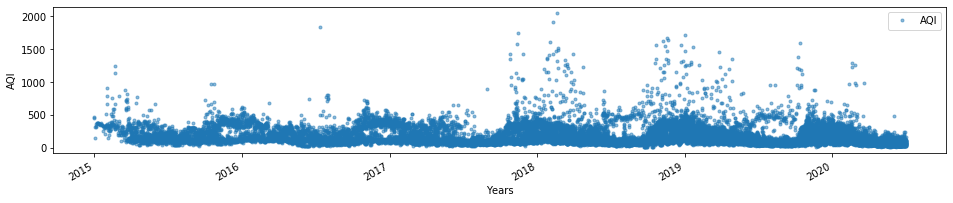

In [19]:
visualiseAQI(updatedCityData, ['AQI'])

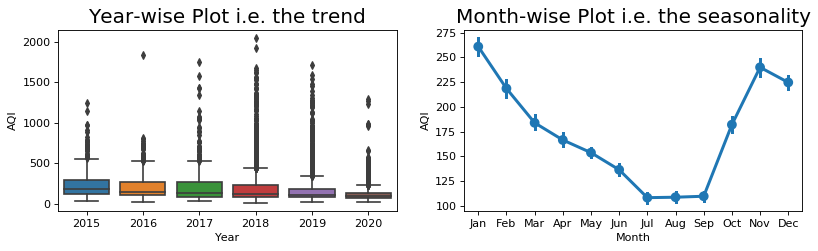

In [20]:
value='AQI'
trend_plot(updatedCityData,value)

# 3. Cities and Pollution

## a. Most Polluted cities

In [26]:
def max_polluted_city(pollutant, data):
    x1 = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='coolwarm')

In [30]:
pm = max_polluted_city('Particulate_Matter', updatedCityData)
no2 = max_polluted_city('NO2', updatedCityData)
so2 = max_polluted_city('SO2', updatedCityData)
co = max_polluted_city('CO', updatedCityData)
btx = max_polluted_city('BTX', updatedCityData)
aqi = max_polluted_city('AQI', updatedCityData)

In [31]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [32]:
display_side_by_side(pm,no2,so2,o3)

,City,Particulate_Matter
0,Delhi,352.480000
1,Gurugram,289.980000
2,Talcher,233.790000
3,Jorapokhar,198.450000
4,Patna,192.580000
5,Brajrajnagar,189.680000
6,Kolkata,179.990000
7,Guwahati,179.890000
8,Jaipur,178.000000
9,Amritsar,173.950000


## b. AQI of some cities

In [63]:
cities = ['Ahmedabad','Delhi','Mumbai','Kolkata','Hyderabad','Chennai']
filtered_city_day = updatedCityData[updatedCityData['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [64]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

Text(0, 0.5, 'AQI')

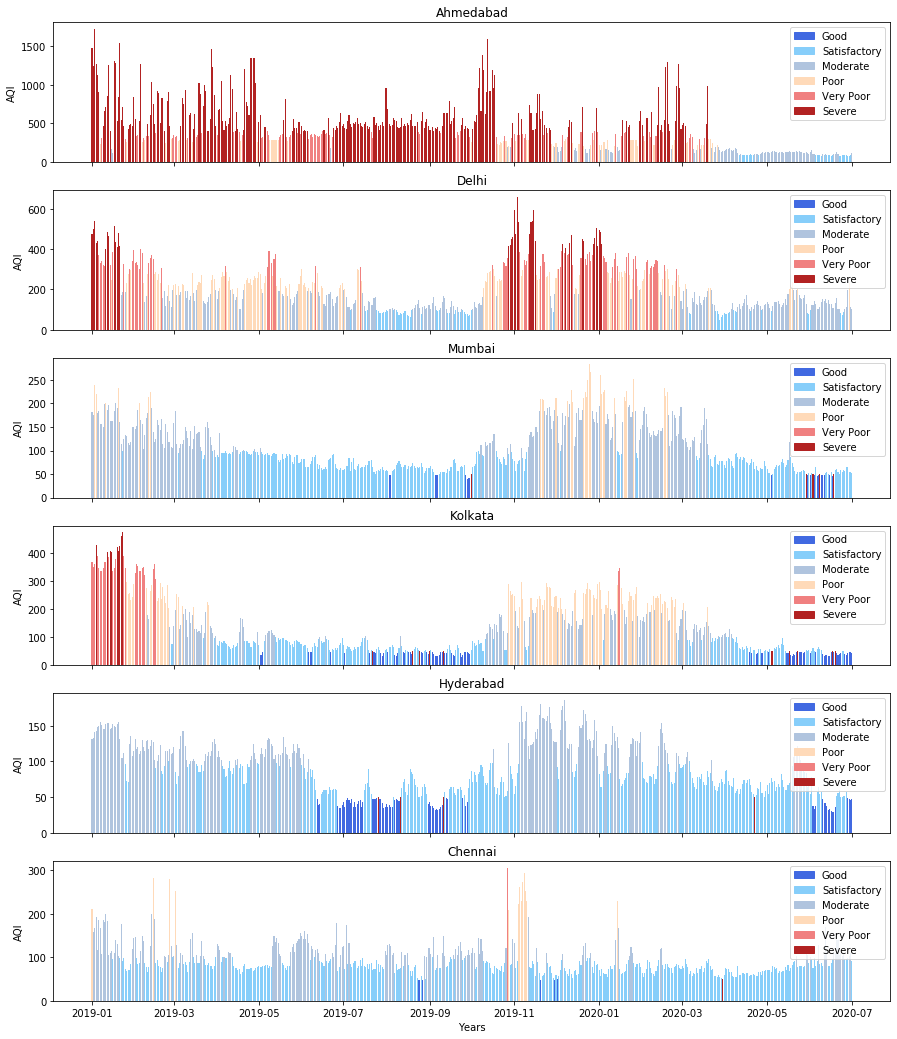

In [65]:
def getColorBar(city):
    col = []
    for val in AQI_pivot[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col


ah = getColorBar('Ahmedabad')
de = getColorBar('Delhi')
mu = getColorBar('Mumbai')
ko = getColorBar('Kolkata')
hy = getColorBar('Hyderabad')
ch = getColorBar('Chennai')

colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
f, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(6, 1, sharex='col', sharey='row', figsize=(15,18))
ax1.bar(AQI_pivot.index, AQI_pivot['Ahmedabad'], color = ah, width = 0.75)
ax2.bar(AQI_pivot.index, AQI_pivot['Delhi'], color = de, width = 0.75)
ax3.bar(AQI_pivot.index, AQI_pivot['Mumbai'], color = mu, width = 0.75)
ax4.bar(AQI_pivot.index, AQI_pivot['Kolkata'], color = ko, width = 0.75)
ax5.bar(AQI_pivot.index, AQI_pivot['Hyderabad'], color = hy, width = 0.75)
ax6.bar(AQI_pivot.index, AQI_pivot['Chennai'], color = ch, width = 0.75)

ax1.legend(handles, labels, loc='upper right')
ax2.legend(handles, labels, loc='upper right')
ax3.legend(handles, labels, loc='upper right')
ax4.legend(handles, labels, loc='upper right')
ax5.legend(handles, labels, loc='upper right')
ax6.legend(handles, labels, loc='upper right')

ax1.title.set_text('Ahmedabad')
ax2.title.set_text('Delhi')
ax3.title.set_text('Mumbai')
ax4.title.set_text('Kolkata')
ax5.title.set_text('Hyderabad')
ax6.title.set_text('Chennai')

ax1.set_ylabel('AQI')
ax2.set_ylabel('AQI')
ax3.set_ylabel('AQI')
ax4.set_ylabel('AQI')
ax5.set_ylabel('AQI')
ax6.set_xlabel('Years')
ax6.set_ylabel('AQI')

# 4. Effect of Lockdown on AQI


## a. AQI in the year 2020 - City-wise

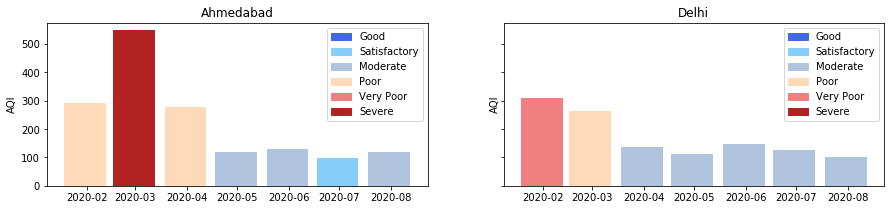

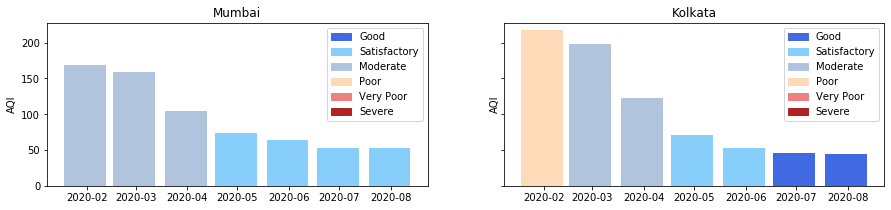

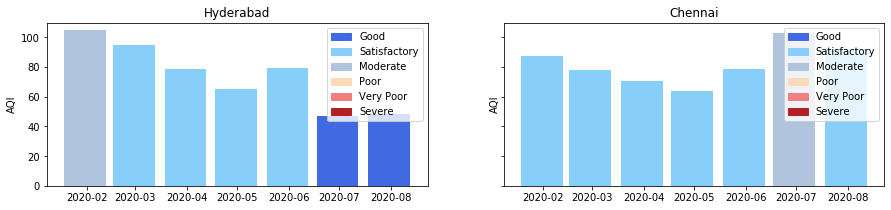

In [66]:
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
AQI_2020 = AQI_2020.resample('M').mean()
# AQI_2020.set_index('Date')
# aqi = aqi.to_numpy()

def getColorBar(city):
    col = []
    for val in AQI_2020[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col

for i in range(0, 6, 2):
    city_1 = cities[i]
    city_2 = cities[i+1]
    fig, ((ax1, ax2)) =  plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,3))
#     ax = fig.add_axes([0,0,1,1])
    ax1.bar(AQI_2020.index, AQI_2020[city_1], width = 25, color=getColorBar(city_1))
    ax1.title.set_text(city_1)
    ax1.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax1.legend(handles, labels, loc='upper right')
    
    ax2.bar(AQI_2020.index, AQI_2020[city_2], width = 25, color=getColorBar(city_2))
    ax2.title.set_text(city_2)
    ax2.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax2.legend(handles, labels, loc='upper right')
    
    
    

## b. AQI before and after Lockdown

It'll be also interesting to see tha difference in AQI before and after the Lockdown.

> ** 📌 Points to note :** 
> * The black line shows the AQI.
> * The coloured rectangles represent the different ranges of AQI.
> * Apparantely, all the six Indian cities seem to be a dangerously high level of pollution levels.
> * Clearly, there appears to be a rapid decline after 25th March,2020 in all the cities under sonsideration.

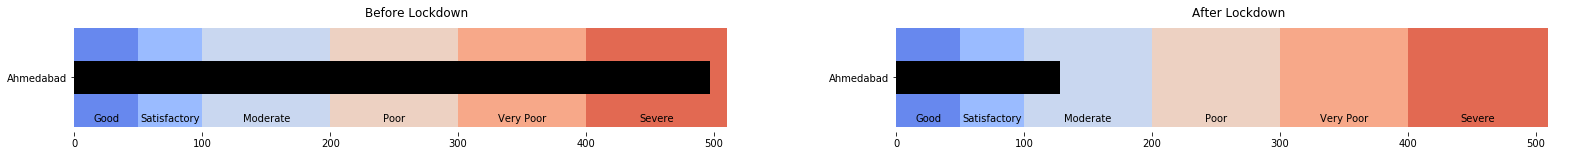

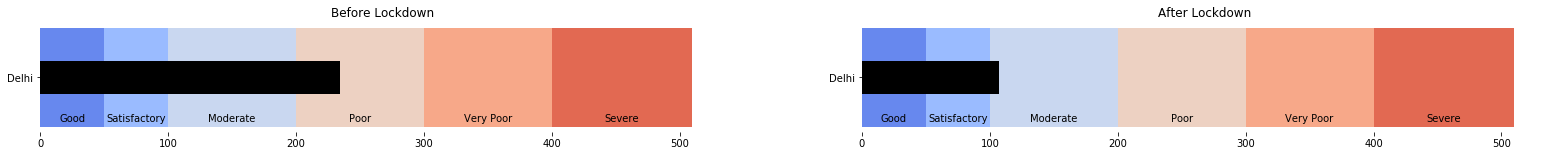

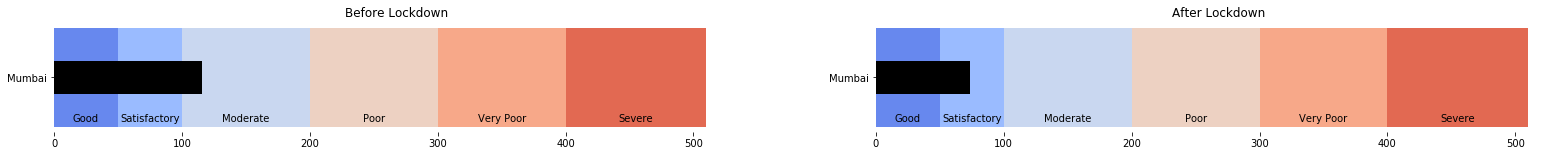

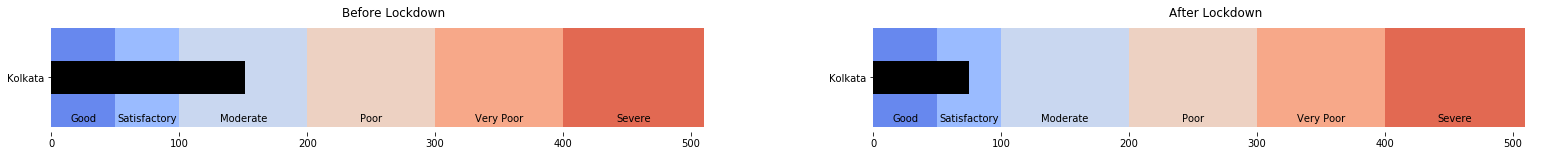

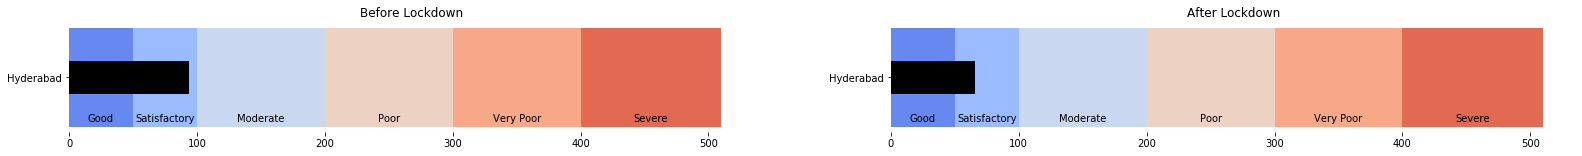

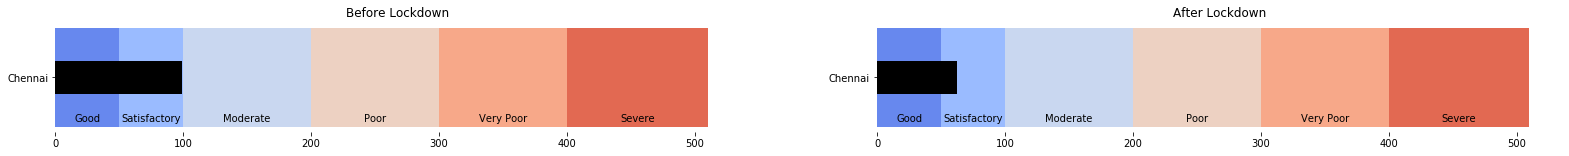

In [67]:
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
limits = [50, 100, 200, 300, 400, 510]
# palette = sns.light_palette("Spectral", len(limits), reverse = True)
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 2))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)
    
    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)
    
    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')
    
    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')

# Preprocessing

In [34]:
#formating Date
print(updatedCityData.columns)
updatedCityData['Date'] = pd.to_datetime(updatedCityData['Date'])

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'Particulate_Matter', 'NO2', 'CO',
       'SO2', 'O3', 'BTX'],
      dtype='object')


In [35]:
# updatedCityData.reset_index()
updatedCityData = updatedCityData[['City','Date','AQI','AQI_Bucket']]

In [36]:
updatedCityData.head()

,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN


### Handling Missing Values 

Filling Missing Values in Database with most frequent values

In [37]:
updatedCityData['AQI'] = updatedCityData['AQI'].fillna(updatedCityData['AQI'].mean(axis=0))
updatedCityData

,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,166.463581,NaN
1,Ahmedabad,2015-01-02,166.463581,NaN
2,Ahmedabad,2015-01-03,166.463581,NaN
3,Ahmedabad,2015-01-04,166.463581,NaN
4,Ahmedabad,2015-01-05,166.463581,NaN
...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.000000,Good
29527,Visakhapatnam,2020-06-28,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,54.000000,Satisfactory


### Changing data structure to City-wise Monthly data

In [38]:
#using cities for Comparision
cities=pd.unique(updatedCityData['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]
updatedCityData.columns
# cities

Index(['City', 'Date', 'AQI', 'AQI_Bucket'], dtype='object')

In [39]:
#Converting to Monthly data for easier usage
final_data= pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'), columns=column1)
for city,i in zip(cities, final_data.columns):
    n = len(np.array(updatedCityData[updatedCityData['City'] == city]['AQI']))
    final_data[i][-n:] = np.array(updatedCityData[updatedCityData['City']==city]['AQI'])

final_data=final_data.astype('float64')
final_data=final_data.resample(rule='MS').mean()

In [40]:
final_data.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2020-03-01,273.885922,70.164932,52.548387,86.402051,90.741935,115.206153,139.132239,55.419355,70.290323,103.876524,...,165.187356,130.369793,122.838710,134.000000,104.645161,158.419355,67.870968,128.362744,74.741935,87.724632
2020-04-01,120.733333,39.233333,44.400000,80.259383,68.533333,126.074836,141.728478,48.648786,63.500000,120.200885,...,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,154.368437,133.282119,57.066667,61.797572
2020-05-01,128.677419,24.193548,59.096774,77.677419,73.161290,104.451613,148.400558,74.129032,78.677419,64.933134,...,135.580645,89.997650,53.161290,119.096774,63.935484,138.516129,32.451613,109.737236,55.967742,64.903226
2020-06-01,101.964239,25.715453,47.866667,101.533333,55.166667,71.666667,156.637532,66.500000,103.066667,38.366667,...,136.533333,93.866667,46.466667,96.500000,53.300000,82.366667,41.597572,115.218766,45.400000,82.200000
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,166.463581,66.000000,92.000000,166.463581,...,86.000000,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000


### Observing Data for a particular city

In [41]:
#use any City AQI instead to Predict Models for that City
# final_data['Delhi_AQI'] = final_data.mean(axis=1)
delhi_aqi = final_data['Delhi_AQI']
delhi_aqi.tail()

2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: Delhi_AQI, dtype: float64

### Observing Data for a particular year

In [42]:
#Obesrving the data for Last Year
data_2019 = final_data['2019-01-01':'2019-12-31']
data_2019

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2019-01-01,755.516129,NaN,218.612903,96.950438,116.806452,NaN,259.967742,NaN,131.000000,NaN,...,324.612903,NaN,360.838710,315.516129,165.516129,405.290323,NaN,285.434309,128.161290,263.129032
2019-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,206.766556,NaN,118.071429,NaN,...,187.214286,NaN,266.071429,243.071429,149.821429,296.107143,NaN,316.980842,88.428571,153.318827
2019-03-01,601.741935,NaN,79.967742,101.885922,122.129032,NaN,186.870968,NaN,101.419355,NaN,...,149.578296,NaN,157.774194,217.645161,123.483871,214.032258,NaN,180.065373,88.838710,95.402051
2019-04-01,586.813025,NaN,78.133333,112.000000,124.300000,NaN,179.316338,NaN,87.533333,NaN,...,119.382119,NaN,86.800000,217.700000,98.066667,151.100000,NaN,146.210597,69.933333,95.282119
2019-05-01,373.042513,NaN,114.479172,113.258065,105.387097,NaN,133.948089,NaN,103.612903,NaN,...,135.188849,NaN,88.548387,184.096774,87.870968,170.806452,NaN,132.739586,75.419355,125.305277
2019-06-01,395.133333,NaN,66.333333,106.000000,70.533333,NaN,111.261811,NaN,112.666667,77.048798,...,166.463581,NaN,71.633333,167.700000,72.000000,137.348786,NaN,111.361811,100.400885,104.233333
2019-07-01,470.402051,NaN,57.191199,73.709677,63.741935,NaN,99.851314,NaN,88.709677,77.077121,...,127.437515,NaN,61.935484,94.419355,65.451613,95.580645,NaN,95.064516,56.967742,101.206153
2019-08-01,516.870968,NaN,97.291179,61.402051,59.354839,NaN,126.050419,NaN,85.548387,91.268320,...,109.612903,NaN,54.064516,90.322581,63.709677,111.853664,62.092716,115.958344,51.870968,103.769494
2019-09-01,436.179691,NaN,166.463581,79.833333,72.966667,80.461684,94.966667,96.374287,103.633333,90.348786,...,95.677264,NaN,46.366667,76.633333,58.066667,107.066667,53.446358,94.241502,64.015453,98.026050
2019-10-01,606.660116,NaN,79.975647,149.161290,81.129032,135.322581,111.156591,140.225806,102.903226,98.933134,...,115.154242,NaN,125.516129,205.387097,94.741935,205.446914,75.767145,115.276225,63.451613,104.866269


### Observing data for a particular city and year

In [43]:
# do not use Amritsar's AQI
data_2019 = data_2019.drop(['Amritsar_AQI'],axis=1)
data_2019

,Ahmedabad_AQI,Bengaluru_AQI,Brajrajnagar_AQI,Chennai_AQI,Delhi_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2019-01-01,755.516129,116.806452,259.967742,131.000000,365.741935,291.419355,NaN,133.290323,150.290323,324.612903,360.838710,315.516129,165.516129,405.290323,NaN,285.434309,128.161290,263.129032
2019-02-01,560.535714,106.250000,206.766556,118.071429,258.178571,184.392857,168.225166,113.250000,118.714286,187.214286,266.071429,243.071429,149.821429,296.107143,NaN,316.980842,88.428571,153.318827
2019-03-01,601.741935,122.129032,186.870968,101.419355,197.354839,150.483871,223.290323,106.161290,106.774194,149.578296,157.774194,217.645161,123.483871,214.032258,NaN,180.065373,88.838710,95.402051
2019-04-01,586.813025,124.300000,179.316338,87.533333,219.400000,213.633333,105.933333,94.800000,151.000000,119.382119,86.800000,217.700000,98.066667,151.100000,NaN,146.210597,69.933333,95.282119
2019-05-01,373.042513,105.387097,133.948089,103.612903,235.838710,219.451613,114.481521,113.419355,142.161290,135.188849,88.548387,184.096774,87.870968,170.806452,NaN,132.739586,75.419355,125.305277
2019-06-01,395.133333,70.533333,111.261811,112.666667,197.766667,199.582119,56.900000,64.666667,119.966667,166.463581,71.633333,167.700000,72.000000,137.348786,NaN,111.361811,100.400885,104.233333
2019-07-01,470.402051,63.741935,99.851314,88.709677,145.096774,114.096774,81.707328,48.096774,84.806452,127.437515,61.935484,94.419355,65.451613,95.580645,NaN,95.064516,56.967742,101.206153
2019-08-01,516.870968,59.354839,126.050419,85.548387,99.290323,66.193548,121.000000,57.258065,65.838710,109.612903,54.064516,90.322581,63.709677,111.853664,62.092716,115.958344,51.870968,103.769494
2019-09-01,436.179691,72.966667,94.966667,103.633333,106.533333,88.566667,48.233333,49.966667,76.333333,95.677264,46.366667,76.633333,58.066667,107.066667,53.446358,94.241502,64.015453,98.026050
2019-10-01,606.660116,81.129032,111.156591,102.903226,251.000000,215.354839,101.369793,78.516129,137.806452,115.154242,125.516129,205.387097,94.741935,205.446914,75.767145,115.276225,63.451613,104.866269


## Seasonal decomposition

2015-01-01    166.463581
2015-02-01    166.463581
2015-03-01    164.964756
2015-04-01    144.228478
2015-05-01    133.387097
                 ...    
2020-03-01     78.741935
2020-04-01     65.000000
2020-05-01     79.354839
2020-06-01     47.066667
2020-07-01     48.000000
Freq: MS, Name: Hyderabad_AQI, Length: 67, dtype: float64

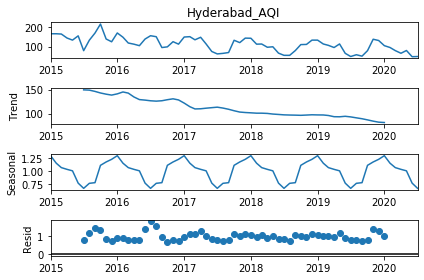

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI = final_data['Hyderabad_AQI']
result = seasonal_decompose(Delhi_AQI, model='multiplicative')
result.plot();
Delhi_AQI

In [79]:
# Forecasting: 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima; 
# print(np.__version__)
# print(np.__path__)
# print 

In [80]:
auto_arima(y=Delhi_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      with_intercept=False)

In [81]:
#dividing into train and test:
train = Delhi_AQI[:41] #from 2015-2018
test = Delhi_AQI[42:54]# june-july 2019

In [82]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [83]:
#predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

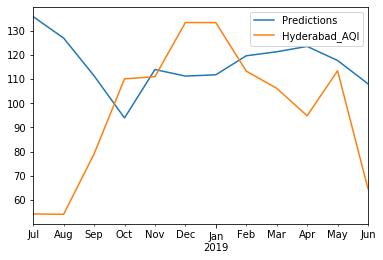

In [84]:
#Plotting predicted values with the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [85]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

Root Mean Squared Error:  37.85122379249102
Mean AQI: 97.27746415770609
Bias: -18.947500


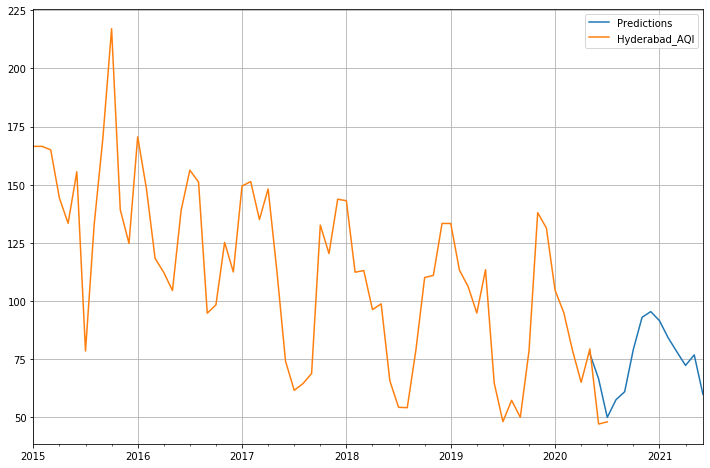

In [48]:
# Forming the model:
final_model = SARIMAX(Delhi_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results = final_model.fit()
# results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_AQI.plot(legend=True,figsize=(12,8),grid=True);

## Deep Leaning Model

In [49]:
Delhi_AQI=Delhi_AQI.reset_index()
Delhi_AQI.columns=['ds','y']
Delhi_AQI=Delhi_AQI.set_index('ds')
train=Delhi_AQI[:-24]
test=Delhi_AQI[-24:-12]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Formatting the data:

In [50]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [51]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.68919577 0.68919577 0.67998959 0.55262191 0.48603131 0.62205931
 0.14880127 0.48325738 0.7115316  1.         0.52153094 0.43293045
 0.71428571 0.57854102 0.39350109 0.35619425 0.3085001  0.52071197
 0.62631266 0.5949689  0.24865991 0.2706414  0.43553926 0.35744006]
Predict this y: 
 [[0.58450565]]


In [87]:
### Creating the model:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### Fitting the model:


In [88]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=250)

Epoch 1/250
43/43 [==============================] - 0s 11ms/step - loss: 0.0517
Epoch 2/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0374
Epoch 3/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0361
Epoch 4/250
43/43 [==============================] - 0s 11ms/step - loss: 0.0341
Epoch 5/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0328
Epoch 6/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0324
Epoch 7/250
43/43 [==============================] - 0s 11ms/step - loss: 0.0302
Epoch 8/250
43/43 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 9/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0283
Epoch 10/250
43/43 [==============================] - 0s 11ms/step - loss: 0.0309
Epoch 11/250
43/43 [==============================] - 0s 11ms/step - loss: 0.0303
Epoch 12/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 13/250
43/43 [======

43/43 [==============================] - 1s 15ms/step - loss: 0.0071
Epoch 102/250
43/43 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 103/250
43/43 [==============================] - 1s 12ms/step - loss: 0.0080
Epoch 104/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 105/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 106/250
43/43 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 107/250
43/43 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 108/250
43/43 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 109/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 110/250
43/43 [==============================] - 1s 14ms/step - loss: 0.0069
Epoch 111/250
43/43 [==============================] - 1s 12ms/step - loss: 0.0067
Epoch 112/250
43/43 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 113/250
43/43 [==

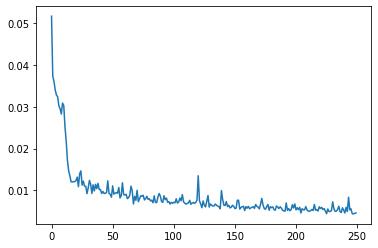

In [89]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [90]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(12,8))
plt.plot(true_predictions)

TypeError: no numeric data to plot

In [ ]:
RMSE=np.sqrt(mean_squared_error(test['y'],test['Predictions']))
print('RMSE = ',RMSE)
print('Hyderabad_AQI=',Delhi_AQI['y'].mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

### Forcasting Using Deep Learning

In [57]:
scaler.fit(Delhi_AQI)
scaled_City_AQI=scaler.transform(Delhi_AQI)
generator = TimeseriesGenerator(scaled_City_AQI, scaled_City_AQI, length=n_input, batch_size=1)
test_predictions = []

first_eval_batch = scaled_City_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Setting Ranges

In [58]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.flatten()
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-06-01',periods=12,freq='MS'))

### Plotting

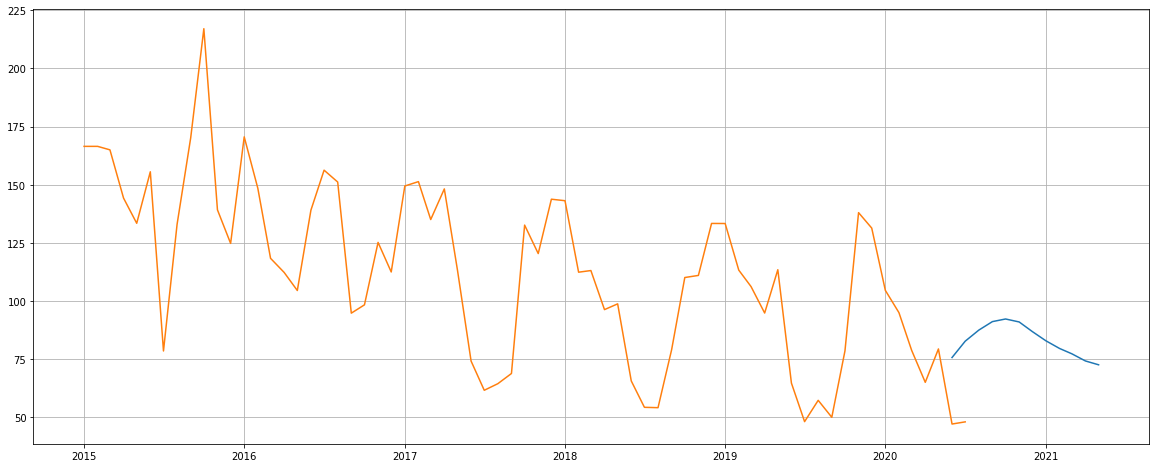

In [59]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( Delhi_AQI['y'])